In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sceb.scdd as sd
import pandas as pd
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#read original files to get raw counts or genes for each sample
WT_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/Aire_WT_filtered_feature_bc_matrix')

In [3]:
WT_10x_data

View of AnnData object with n_obs × n_vars = 12432 × 27998 
    var: 'gene_ids', 'feature_types'

In [4]:
C311Y_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/Aire_C311Y_het_filtered_feature_bc_matrix')

In [5]:
C311Y_10x_data

View of AnnData object with n_obs × n_vars = 15113 × 27998 
    var: 'gene_ids', 'feature_types'

In [6]:
G228W_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/GW_Het_filtered_feature_bc_matrix')

In [7]:
G228W_10x_data

View of AnnData object with n_obs × n_vars = 7244 × 31053 
    var: 'gene_ids', 'feature_types'

In [8]:
#merge different samples
All_TSA = WT_10x_data. concatenate(C311Y_10x_data, G228W_10x_data)

In [9]:
#check the raw data to make sure we have all samples' raw data
All_TSA.obs.index

Index(['AAACCCAAGACATGCG-1-0', 'AAACCCAAGACCATGG-1-0', 'AAACCCAAGCTGTTCA-1-0',
       'AAACCCAAGGAACTCG-1-0', 'AAACCCAAGGCAGGGA-1-0', 'AAACCCACACAGCTGC-1-0',
       'AAACCCACACAGTCGC-1-0', 'AAACCCACACTATCCC-1-0', 'AAACCCACATCTCAAG-1-0',
       'AAACCCACATCTGTTT-1-0',
       ...
       'TTTGGTTTCTTAGGAC-1-2', 'TTTGGTTTCTTCGCTG-1-2', 'TTTGTTGCAGTGGCTC-1-2',
       'TTTGTTGCATGTTCAG-1-2', 'TTTGTTGGTCACGTGC-1-2', 'TTTGTTGTCAAGTTGC-1-2',
       'TTTGTTGTCAATCCGA-1-2', 'TTTGTTGTCATGTCAG-1-2', 'TTTGTTGTCGCGCCAA-1-2',
       'TTTGTTGTCGTTCCTG-1-2'],
      dtype='object', length=34789)

In [10]:
#read already processed data h5 files which already have identified clusters
TECs = sc.read('/Users/Yi/Desktop/Aire C311Y/TECs_wo_KO_wo_cell_cycle.h5ad')

In [11]:
#read the index of the processed data, you can see that there're less genes than the raw data
TECs.obs.index

Index(['AAACCCACACAGTCGC-1-0', 'AAACCCAGTAGTGTGG-1-0', 'AAACCCATCACTTTGT-1-0',
       'AAACGAATCTACTATC-1-0', 'AAACGCTAGTAAATGC-1-0', 'AAACGCTTCCCATGGG-1-0',
       'AAACGCTTCGCATTAG-1-0', 'AAAGAACAGAGTCAAT-1-0', 'AAAGGGCAGAGCAGCT-1-0',
       'AAAGGTATCGTAGGGA-1-0',
       ...
       'TTTCACATCAGAGCGA-1-2', 'TTTCAGTGTGTCGCTG-1-2', 'TTTCCTCCAGCGTATT-1-2',
       'TTTCGATAGCGCAATG-1-2', 'TTTCGATAGGAAAGGT-1-2', 'TTTCGATCAGGACAGT-1-2',
       'TTTCGATCATCTATCT-1-2', 'TTTCGATTCCAACTAG-1-2', 'TTTGACTTCCCAATAG-1-2',
       'TTTGGTTAGTGGTTGG-1-2'],
      dtype='object', name='index', length=3592)

In [12]:
#creat a copy raw data
raw=All_TSA[TECs.obs.index].copy()

In [13]:
#focus on mTEC subsets only
mTEC = TECs[(TECs.obs.leiden == 'Mature_mTEC1')|(TECs.obs.leiden == 'Mature_mTEC2')]

In [14]:
mTEC.obs.index

Index(['AAACCCACACAGTCGC-1-0', 'AAACCCATCACTTTGT-1-0', 'AAACGAATCTACTATC-1-0',
       'AAAGGGCAGAGCAGCT-1-0', 'AAATGGAAGGTCGTAG-1-0', 'AACAAAGAGACTCTTG-1-0',
       'AACAAAGCATCTAACG-1-0', 'AACCACATCTCGGGAC-1-0', 'AACCATGCAGGAGGAG-1-0',
       'AACCATGTCTAGTACG-1-0',
       ...
       'TTGGATGCATTACTCT-1-2', 'TTGTTCACATAATCCG-1-2', 'TTGTTGTAGCTGACCC-1-2',
       'TTTAGTCCACGAAGAC-1-2', 'TTTATGCCAGATACTC-1-2', 'TTTCCTCCAGCGTATT-1-2',
       'TTTCGATCAGGACAGT-1-2', 'TTTCGATTCCAACTAG-1-2', 'TTTGACTTCCCAATAG-1-2',
       'TTTGGTTAGTGGTTGG-1-2'],
      dtype='object', name='index', length=1333)

In [15]:
#look at raw genes from mTEC subsets
raw_mTEC=All_TSA[mTEC.obs.index].copy()

In [16]:
sc.pp.filter_cells(raw_mTEC, min_counts=0)

In [17]:
sc.pp.filter_cells(raw_mTEC, min_genes=0)

In [18]:
raw_mTEC.obs['n_counts_log']=np.log1p(raw_mTEC.obs.n_counts)

In [19]:
raw_mTEC.obs['n_genes_log']=np.log1p(raw_mTEC.obs.n_genes)

... storing 'feature_types-0' as categorical
... storing 'feature_types-1' as categorical
... storing 'feature_types-2' as categorical


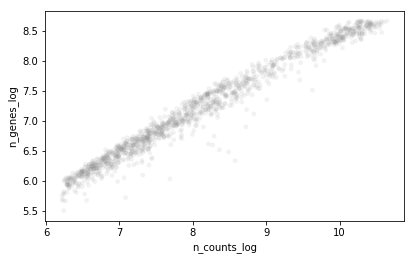

In [20]:
sc.pl.scatter(raw_mTEC, x='n_counts_log', y='n_genes_log',alpha=0.1)

In [21]:
# Filter genes with >0.1 mean read per cell.
sc.pp.filter_genes(raw_mTEC,min_counts=0.1*raw_mTEC.shape[0])
gene_list = np.array(raw_mTEC.var_names)

In [22]:
raw_mTEC[(raw_mTEC.obs.n_counts_log<9) & (raw_mTEC.obs.n_counts_log>7)]

View of AnnData object with n_obs × n_vars = 702 × 7300 
    obs: 'batch', 'n_counts', 'n_genes', 'n_counts_log', 'n_genes_log'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'feature_types-1', 'gene_ids-2', 'feature_types-2', 'n_counts'

In [23]:
'Tspan8' in gene_list.tolist()

True

In [24]:
'Aire' in gene_list.tolist()

True

In [25]:
Nc,G,Nr,Nr_bar = sd.get_info(raw_mTEC)

## Nc=1333, G=7300, Nr=6719.81, Nr_bar=0.92


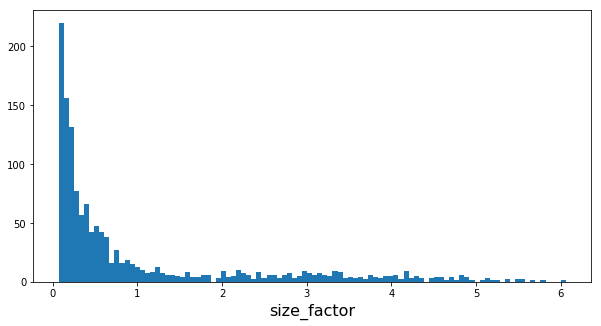

In [26]:
# Estimate the cell size factor
size_factor = sd.dd_size_factor(raw_mTEC)
plt.figure(figsize=[10,5])
plt.hist(size_factor, bins=100)
plt.xlabel('size_factor', fontsize=16)
plt.show()

In [27]:
M_ml, M_dd = sd.dd_1d_moment(raw_mTEC, size_factor=size_factor)
#cv_ml = sd.M_to_cv(M_ml) comparison for paper
cv_dd = sd.M_to_cv(M_dd)

#time start: 0.0s
n_cell=1333, n_gene=7300
#total: 0.01s


In [28]:
# Estimate PC using plug-in (ml) not the right way for correlation
#mean_ml,cov_ml,PC_ml  = sd.ml_covariance(raw_mTEC, size_factor=size_factor, verbose=True)
# Estimate PC using EB (dd)
mean_dd,cov_dd,PC_dd  = sd.dd_covariance(raw_mTEC, size_factor=size_factor,\
                                         PC_prune=True, verbose=True)

#time start: 0.0s
n_cell=1333, n_gene=7300, Nr=6719.8
#total: 18.49s


In [29]:
PC_dd.sum(axis=0)

array([-37.61380352, 111.60400302, -14.24613217, ...,  93.54707407,
        56.91357742, 131.17836376])

In [30]:
non_zero=np.where(PC_dd.sum(axis=0)!=0)[0]

In [31]:
PC_mTEC=PC_dd[non_zero, :][:, non_zero]

In [32]:
new_gene_list=gene_list[non_zero]

In [33]:
PC_mTEC.shape,new_gene_list.shape

((5300, 5300), (5300,))

In [34]:
corrected_correlations_mTEC=pd.DataFrame(PC_mTEC, index=new_gene_list.tolist(), columns=new_gene_list.tolist())

In [36]:
#sns.clustermap(corrected_correlations_mTEC,cmap='bwr')

In [ ]:
#corrected_correlations_mTEC['Tspan8'].sort_values(ascending=False)

In [37]:
Aire_correlation=corrected_correlations_mTEC['Aire'].sort_values(ascending=False)

In [38]:
Aire_correlation.to_csv('/Users/Yi/Desktop/Aire_correlated_mTEC_merged.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [39]:
#random_list_mTEC=np.random.permutation(corrected_correlations_mTEC.index)

In [40]:
#random_mTEC=random_list_mTEC.tolist()[:300]
#random_matrix_mTEC=corrected_correlations_mTEC[random_mTEC].loc[random_mTEC]

In [41]:
#sns.clustermap(random_matrix_mTEC,cmap='bwr')

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [43]:
top_300_mTEC = corrected_correlations_mTEC['Aire'].sort_values(ascending = False).index.tolist()[:300]
top_300_mTEC_matrix = corrected_correlations_mTEC[top_300_mTEC].loc[top_300_mTEC]

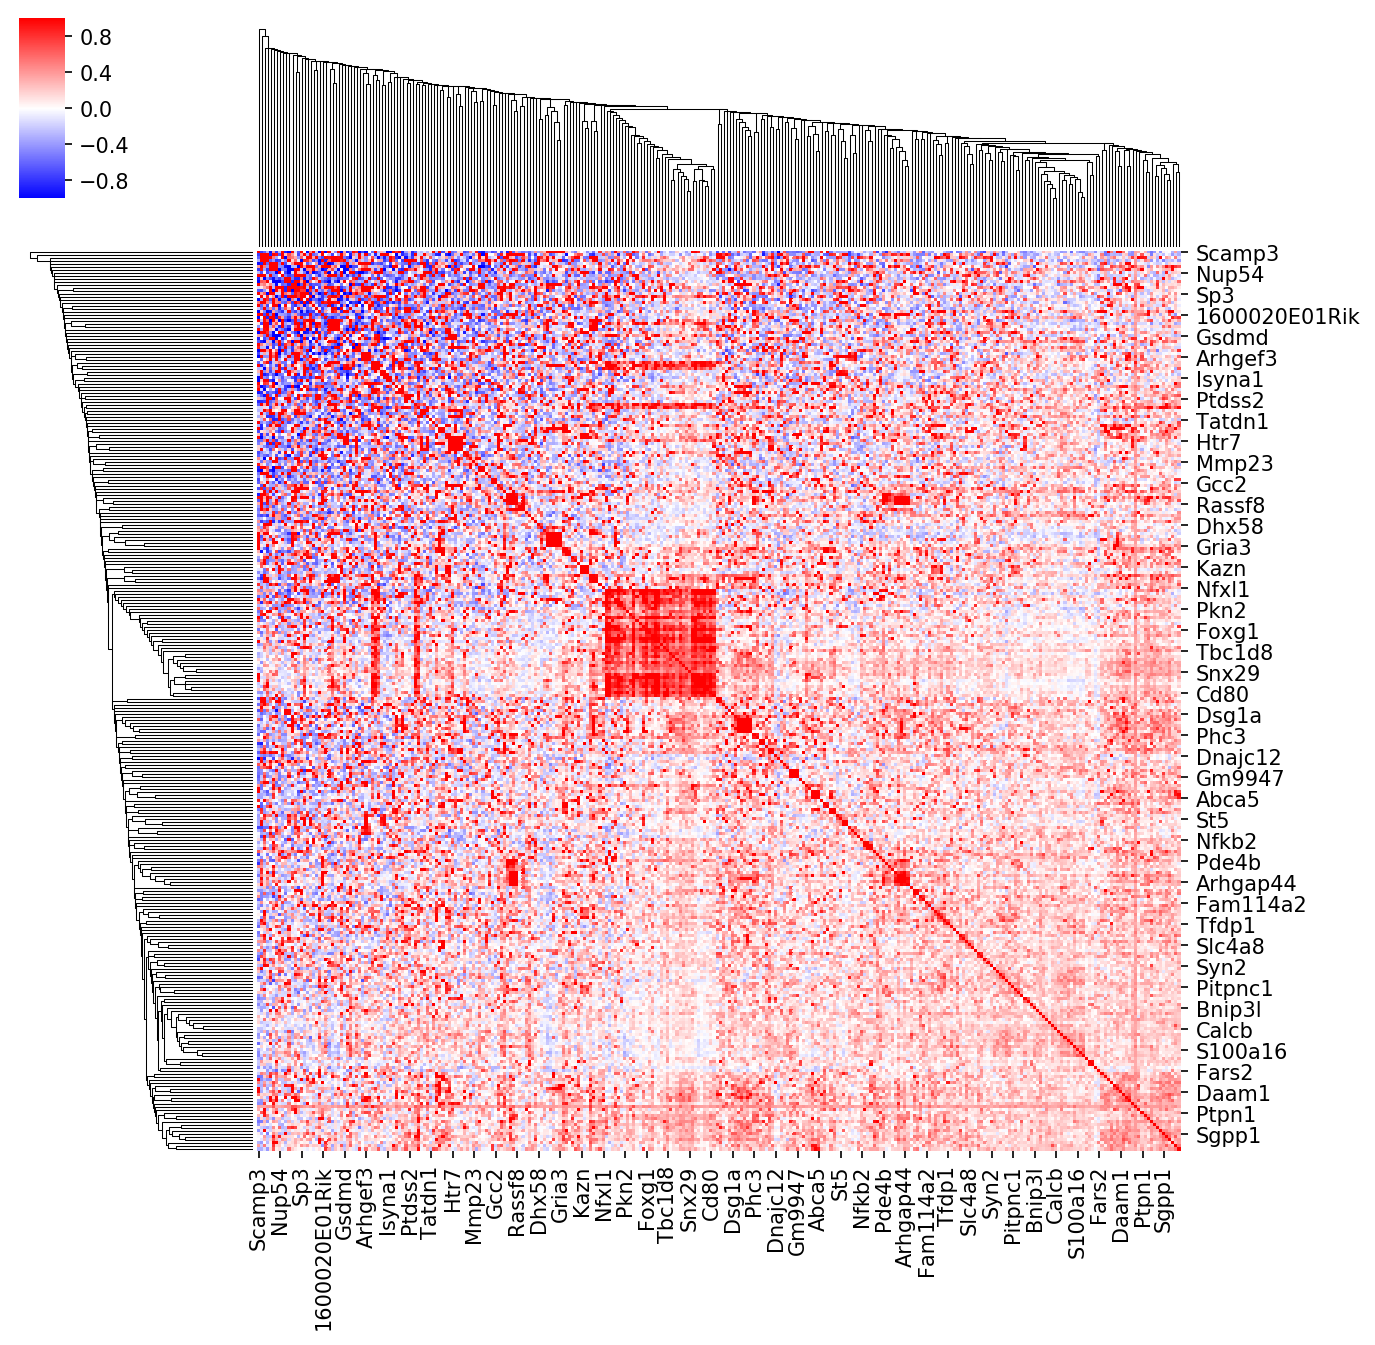

In [44]:
Aire_top=sns.clustermap(top_300_mTEC_matrix,cmap='bwr')

In [45]:
Aire_top.savefig('Aire_top300_mTEC_merged.svg')

In [ ]:
#top_300_Tspan8_mTEC = corrected_correlations_mTEC['Tspan8'].sort_values(ascending = False).index.tolist()[:300]
top_300_Tspan8_mTEC_matrix = corrected_correlations_mTEC[top_300_Tspan8_mTEC].loc[top_300_Tspan8_mTEC]

In [ ]:
#sns.clustermap(top_300_Tspan8_mTEC_matrix,cmap='bwr')